In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)
pd.set_option('precision',2)

In [4]:
df= pd.read_csv('CarPrice_Assignment.csv',encoding="ISO-8859-1",low_memory=True)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


We could see there is no as such outliers in the data by visualising the mean and median.

# Data cleaning

Car ID is of no use. We can remove it.

In [7]:
df= df.drop('car_ID',axis=1)

In [8]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

As the CarName is comprising of two parts, removing the name and restoring the brand name in the same column

In [11]:
df['CarName']=df['CarName'].apply(lambda x: str.lower(x))
df['CarName']=df['CarName'].apply(lambda x: x.split()[0])

In [12]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Since we have some spelling error of some brands, we need to make sure that it should be corrected.

In [13]:
df.loc[df['CarName'].isin(['maxda']),'CarName']='mazda'
df.loc[df['CarName'].isin(['porcshce']),'CarName']='porsche'
df.loc[df['CarName'].isin(['toyouta']),'CarName']='toyota'
df.loc[df['CarName'].isin(['vokswagen']),'CarName']='volkswagen'
df.loc[df['CarName'].isin(['vw']),'CarName']='volkswagen'

In [14]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [16]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [17]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

Converting doornumber to integer.

'two':2       'four':4

In [18]:
df['doornumber']= df['doornumber'].map({'two':2,'four':4})

In [19]:
df['doornumber'].unique()

array([2, 4], dtype=int64)

In [20]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [21]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [22]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [23]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [24]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

Converting cylinder number to interger.

In [25]:
df['cylindernumber']= df['cylindernumber'].map({'two':2,'four':4,'six':6,'five':5,'three':3,'twelve':12,'eight':8})

In [26]:
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [27]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

# EDA

In [28]:
df.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,3.12,98.76,174.05,65.91,53.72,2555.57,4.38,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,1.25,0.99,6.02,12.34,2.15,2.44,520.68,1.08,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,-2.00,2.00,86.60,141.10,60.30,47.80,1488.00,2.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,0.00,2.00,94.50,166.30,64.10,52.00,2145.00,4.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,1.00,4.00,97.00,173.20,65.50,54.10,2414.00,4.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,2.00,4.00,102.40,183.10,66.90,55.50,2935.00,4.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,3.00,4.00,120.90,208.10,72.30,59.80,4066.00,12.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [29]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [30]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
df.shape

(205, 25)

Scatter plot for all numeric data.

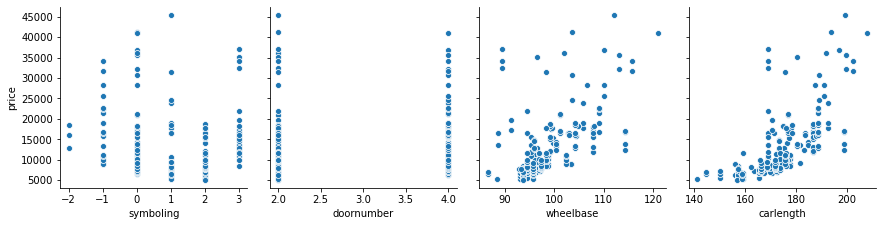

In [32]:
sns.pairplot(df, x_vars=['symboling', 'doornumber','wheelbase', 'carlength'], y_vars='price',size=3, aspect=1, kind='scatter')
plt.show()

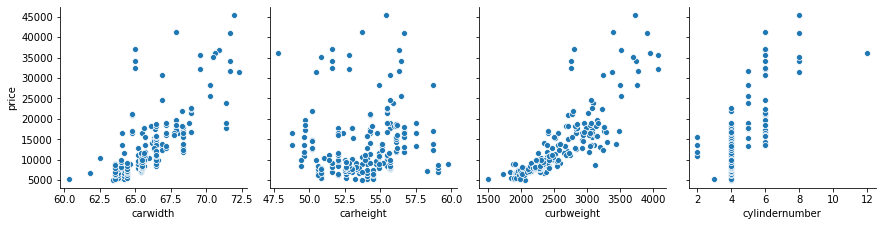

In [33]:
sns.pairplot(df, x_vars=['carwidth', 'carheight', 'curbweight','cylindernumber'], y_vars='price',size=3, aspect=1, kind='scatter')
plt.show()

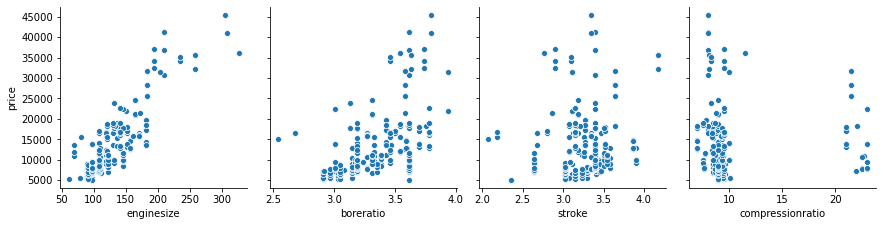

In [34]:
sns.pairplot(df, x_vars=['enginesize', 'boreratio', 'stroke', 'compressionratio'], y_vars='price',size=3, aspect=1, kind='scatter')
plt.show()

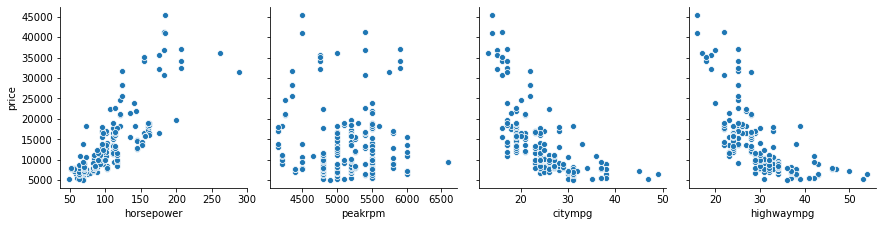

In [35]:
sns.pairplot(df, x_vars=['horsepower', 'peakrpm', 'citympg', 'highwaympg'], y_vars='price',size=3, aspect=1, kind='scatter')
plt.show()

Column like wheelbase, carlength, carwidth, curbweight, cylindernumber, horsepower has positive correlation while citympg and highwaympg have negative correlation beacuse luxury/sports car have very less mileage.

In [36]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


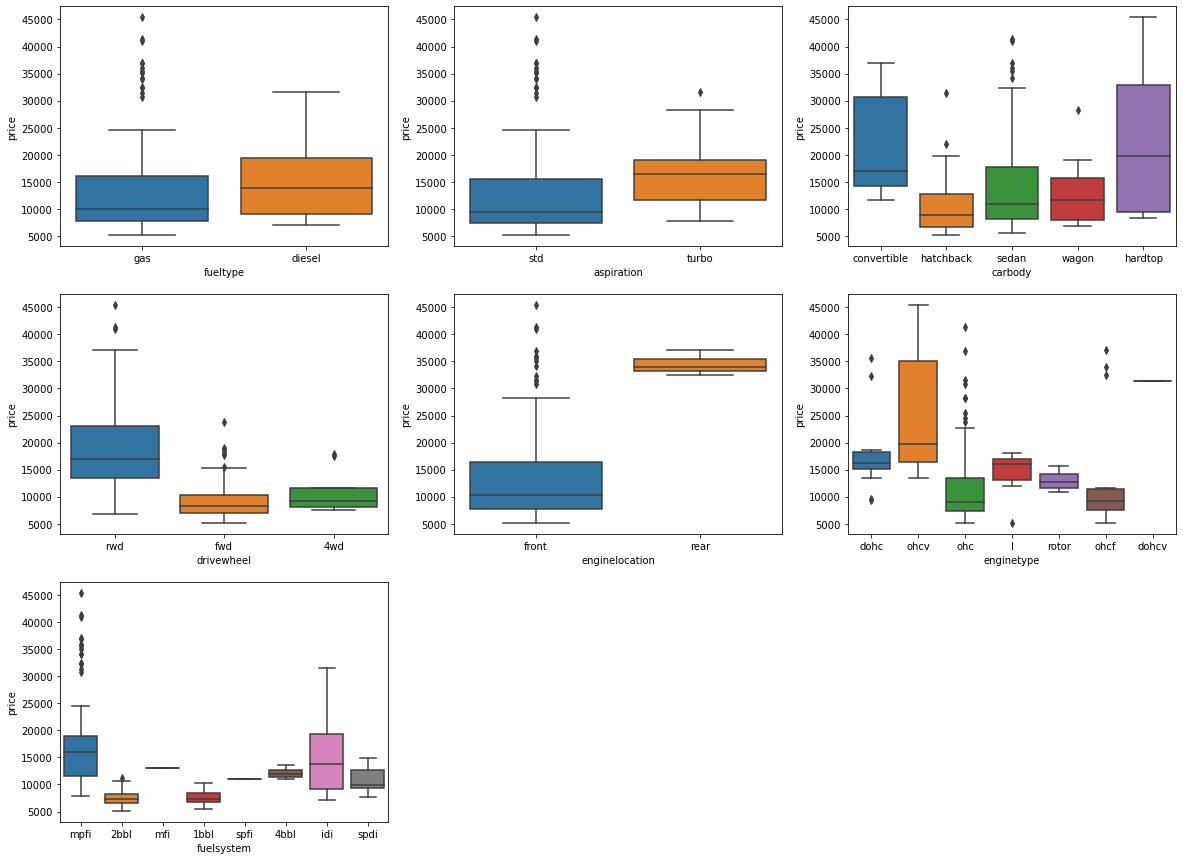

In [37]:
plt.figure(figsize=(20,15))
list=['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']
for n in range(7):
    plt.subplot(3,3,n+1)
    sns.boxplot(x= list[n], y='price',data=df)
plt.show()

Engine_location and Drive_wheel have significant effect on car price. 

Rear engine cars are costlier than front engine cars. 

'rwd' cars are the costliest as compared to 'fwd' and '4wd' cars.

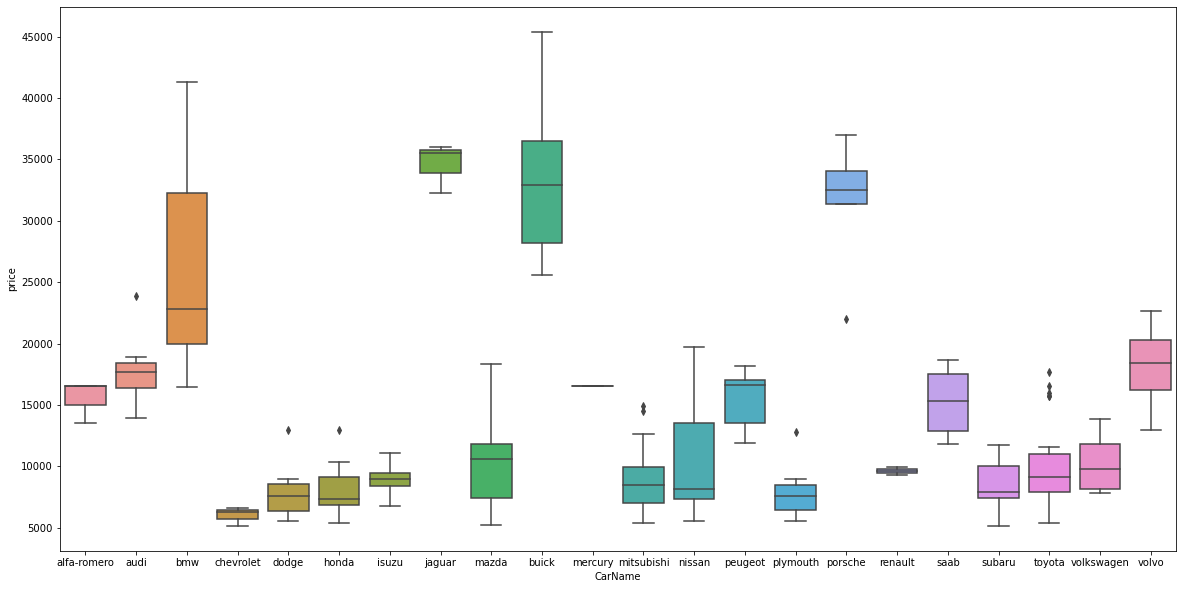

In [38]:
plt.figure(figsize=(20,10))
sns.boxplot(x='CarName',y='price', data=df)

Car brands like 'bmw', 'jaguar', 'buick', 'porsche' are in the luxury segment so their cost are much higher as compared to other brand cars.

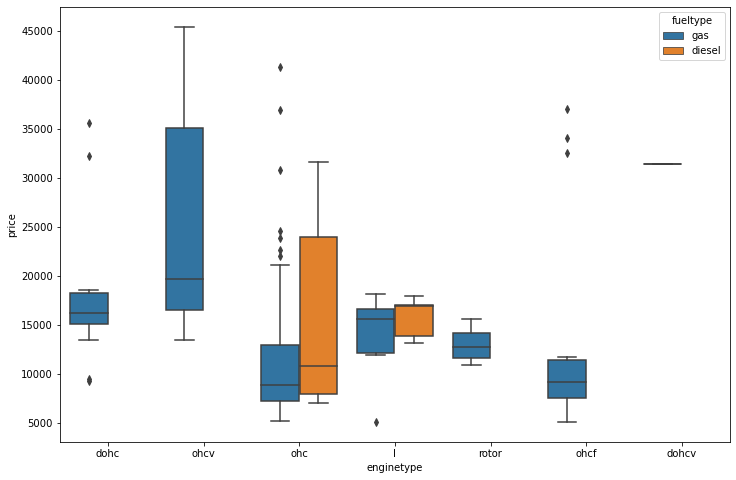

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(x='enginetype',y='price',hue='fueltype', data=df)

Diesel driven cars have only two type of engines 'ohc' and 'l'.

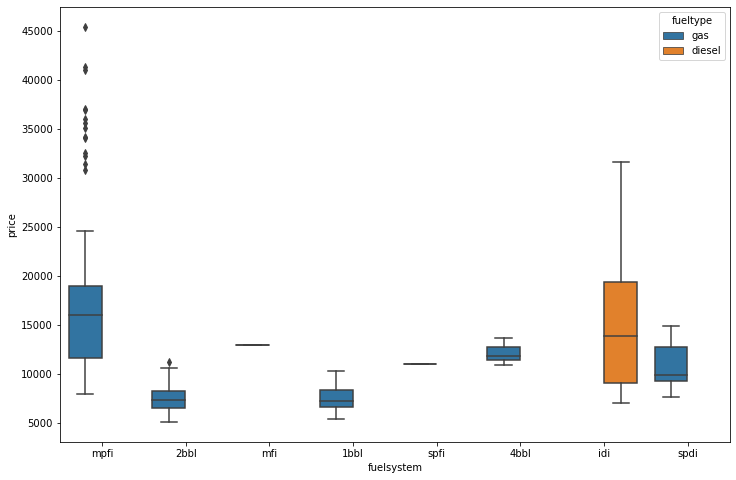

In [40]:
plt.figure(figsize=(12,8))
sns.boxplot(x='fuelsystem',y='price',hue='fueltype', data=df)

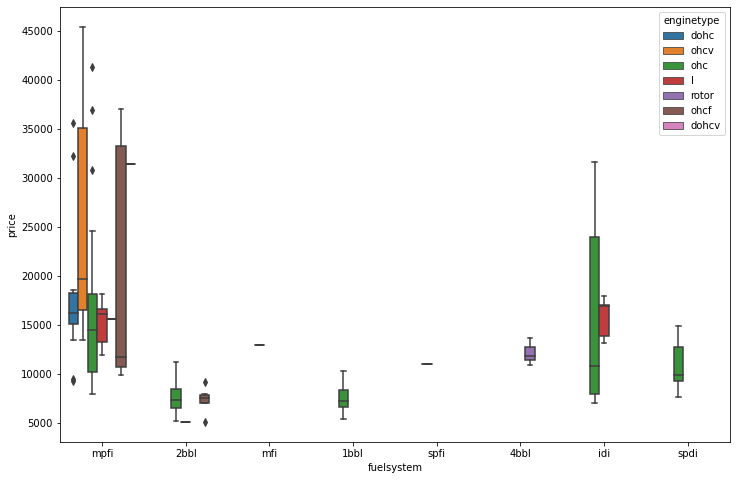

In [41]:
plt.figure(figsize=(12,8))
sns.boxplot(x='fuelsystem',y='price',hue='enginetype', data=df)

In [42]:
df.groupby(['fuelsystem']).price.count()

fuelsystem
1bbl    11
2bbl    66
4bbl     3
idi     20
mfi      1
mpfi    94
spdi     9
spfi     1
Name: price, dtype: int64

In [43]:
df.groupby(['enginetype','fuelsystem']).price.count()

enginetype  fuelsystem
dohc        mpfi          12
dohcv       mpfi           1
l           2bbl           1
            idi            5
            mpfi           6
ohc         1bbl          11
            2bbl          57
            idi           15
            mfi            1
            mpfi          54
            spdi           9
            spfi           1
ohcf        2bbl           8
            mpfi           7
ohcv        mpfi          13
rotor       4bbl           3
            mpfi           1
Name: price, dtype: int64

## Data Preparation

Converting binary categorical varibales into numerical (1 & 0)

Fueltype (Diesel:1, Gas:0)

Aspiration (Turbo:1, Std:0)

Enginelocation (Rear:1, Front:0)

In [44]:
df['fueltype']= df['fueltype'].map({'diesel':1,'gas':0})
df['aspiration']= df['aspiration'].map({'turbo':1,'std':0})
df['enginelocation']= df['enginelocation'].map({'rear':1,'front':0})

In [45]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,0,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,0,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,0,0,2,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,0,0,4,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,0,0,4,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


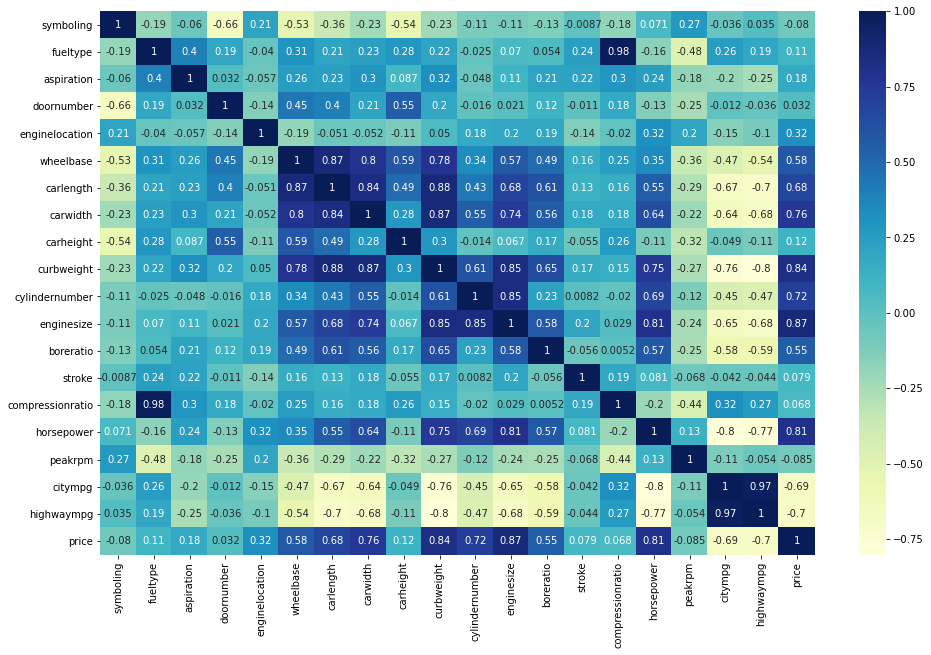

In [46]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [47]:
dm= pd.get_dummies(df['drivewheel'])

In [48]:
dm.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


Now, we don't need three columns. we can drop the `4wd` column, as the type of drivewheel can be identified with just the last two columns where — 
- `00` will correspond to `4wd`
- `01` will correspond to `rwd`
- `10` will correspond to `fwd`

In [49]:
dm.drop('4wd',axis=1,inplace=True)
df= pd.concat([df,dm],axis=1)
df.drop('drivewheel',axis=1,inplace=True)

In [50]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fwd,rwd
0,3,alfa-romero,0,0,2,convertible,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1
1,3,alfa-romero,0,0,2,convertible,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1
2,1,alfa-romero,0,0,2,hatchback,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1
3,2,audi,0,0,4,sedan,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0
4,2,audi,0,0,4,sedan,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0


In [51]:
df.groupby('CarName').price.mean().sort_values(ascending= False)

CarName
jaguar         34600.00
buick          33647.00
porsche        31400.50
bmw            26118.75
volvo          18063.18
audi           17859.17
mercury        16503.00
alfa-romero    15498.33
peugeot        15489.09
saab           15223.33
mazda          10652.88
nissan         10415.67
volkswagen     10077.50
toyota          9885.81
renault         9595.00
mitsubishi      9239.77
isuzu           8916.50
subaru          8541.25
honda           8184.69
plymouth        7963.43
dodge           7875.44
chevrolet       6007.00
Name: price, dtype: float64

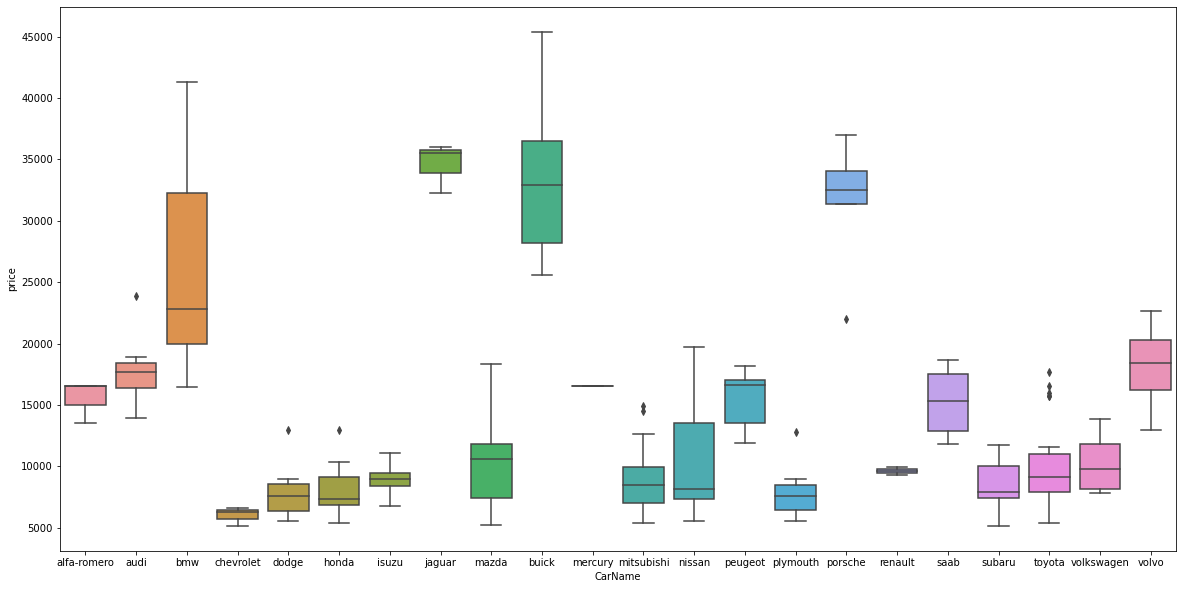

In [52]:
plt.figure(figsize=(20,10))
sns.boxplot(x='CarName',y='price', data=df)

Since CarName(brand) has more than 20 levels, it is better to bin them into categories.

Luxury=bmw, jaguar, buick, porsche

middle= alfa-romero, audi, peugeot, saab, volvo, mercury

lower= mazda, nissan, volkswagen, toyota, renault, mitsubishi, isuzu, subaru, honda, plymouth, dodge, chevrolet

In [53]:
luxury= ['bmw', 'jaguar', 'buick', 'porsche']
middle= ['alfa-romero', 'audi', 'peugeot', 'saab', 'volvo', 'mercury']
lower= ['mazda', 'nissan', 'volkswagen', 'toyota', 'renault', 'mitsubishi', 'isuzu', 'subaru', 'honda', 'plymouth', 'dodge', 'chevrolet']
def carbin(name):
    if name in (luxury):
        return 'luxury'
    elif name in middle:
        return 'middle'
    else:
        return 'lower'
df['car_name_bin']= df['CarName'].apply(carbin)

In [54]:
df.car_name_bin.unique()

array(['middle', 'luxury', 'lower'], dtype=object)

In [55]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fwd,rwd,car_name_bin
0,3,alfa-romero,0,0,2,convertible,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,middle
1,3,alfa-romero,0,0,2,convertible,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,middle
2,1,alfa-romero,0,0,2,hatchback,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,middle
3,2,audi,0,0,4,sedan,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,middle
4,2,audi,0,0,4,sedan,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,middle


Since car_name_bin is a order categorical data like luxury>middle>lower in terms of price value, we will use labelencoder to convert it into numerical value.

In [56]:
from sklearn import preprocessing 
le= preprocessing.LabelEncoder()
df['car_name_bin']= le.fit_transform(df['car_name_bin'])

In [57]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fwd,rwd,car_name_bin
0,3,alfa-romero,0,0,2,convertible,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,2
1,3,alfa-romero,0,0,2,convertible,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,2
2,1,alfa-romero,0,0,2,hatchback,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,2
3,2,audi,0,0,4,sedan,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,2
4,2,audi,0,0,4,sedan,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,2


In [58]:
df.drop(['CarName'],axis=1,inplace=True)

In [59]:
(df.groupby(['enginetype']).price.count()/df.shape[0])*100

enginetype
dohc      5.85
dohcv     0.49
l         5.85
ohc      72.20
ohcf      7.32
ohcv      6.34
rotor     1.95
Name: price, dtype: float64

In [60]:
(df.groupby(['fuelsystem']).price.count()/df.shape[0])*100

fuelsystem
1bbl     5.37
2bbl    32.20
4bbl     1.46
idi      9.76
mfi      0.49
mpfi    45.85
spdi     4.39
spfi     0.49
Name: price, dtype: float64

Putting all those levels which are less than 5% into 'Others' category and converting them into numerical value by get_dummies method.

dohcv, rotor = 'Others'

4bbl, mfi, spfi = 'Others'

In [61]:
df.loc[df['enginetype'].isin (['dohcv','rotor']),'enginetype']= 'others'
df.loc[df['fuelsystem'].isin (['4bbl','mfi','spfi']),'fuelsystem']= 'others'

In [62]:
dm= pd.get_dummies(df['enginetype'])
dm.head()

,dohc,l,ohc,ohcf,ohcv,others
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [63]:
dm.drop('others',axis=1,inplace=True)
df= pd.concat([df,dm],axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fwd,rwd,car_name_bin,dohc,l,ohc,ohcf,ohcv
0,3,0,0,2,convertible,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,2,1,0,0,0,0
1,3,0,0,2,convertible,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,2,1,0,0,0,0
2,1,0,0,2,hatchback,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,2,0,0,0,0,1
3,2,0,0,4,sedan,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,2,0,0,1,0,0
4,2,0,0,4,sedan,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,2,0,0,1,0,0


In [64]:
dm= pd.get_dummies(df['fuelsystem'])
dm.head()

,1bbl,2bbl,idi,mpfi,others,spdi
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [65]:
dm.drop('others',axis=1,inplace=True)
df= pd.concat([df,dm],axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fwd,rwd,car_name_bin,dohc,l,ohc,ohcf,ohcv,1bbl,2bbl,idi,mpfi,spdi
0,3,0,0,2,convertible,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,2,1,0,0,0,0,0,0,0,1,0
1,3,0,0,2,convertible,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,2,1,0,0,0,0,0,0,0,1,0
2,1,0,0,2,hatchback,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,2,0,0,0,0,1,0,0,0,1,0
3,2,0,0,4,sedan,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,2,0,0,1,0,0,0,0,0,1,0
4,2,0,0,4,sedan,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,2,0,0,1,0,0,0,0,0,1,0


In [66]:
df.drop(['fuelsystem','enginetype'],axis=1,inplace=True)

In [67]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fwd,rwd,car_name_bin,dohc,l,ohc,ohcf,ohcv,1bbl,2bbl,idi,mpfi,spdi
0,3,0,0,2,convertible,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,2,1,0,0,0,0,0,0,0,1,0
1,3,0,0,2,convertible,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,2,1,0,0,0,0,0,0,0,1,0
2,1,0,0,2,hatchback,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,2,0,0,0,0,1,0,0,0,1,0
3,2,0,0,4,sedan,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,2,0,0,1,0,0,0,0,0,1,0
4,2,0,0,4,sedan,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,2,0,0,1,0,0,0,0,0,1,0


In [68]:
dm= pd.get_dummies(df['carbody'],drop_first=True)
dm.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [69]:
df=pd.concat([df,dm],axis=1)
df.drop(['carbody'],axis=1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fwd,rwd,car_name_bin,dohc,l,ohc,ohcf,ohcv,1bbl,2bbl,idi,mpfi,spdi,hardtop,hatchback,sedan,wagon
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,2,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [70]:
df.shape

(205, 37)

In [71]:
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fwd,rwd,car_name_bin,dohc,l,ohc,ohcf,ohcv,1bbl,2bbl,idi,mpfi,spdi,hardtop,hatchback,sedan,wagon
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,2,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0


## Splitting the Data into Training and Testing Sets

We will split the dataset into 70 and 30 for training and testing data.

In [72]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [73]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fwd,rwd,car_name_bin,dohc,l,ohc,ohcf,ohcv,1bbl,2bbl,idi,mpfi,spdi,hardtop,hatchback,sedan,wagon
122,1,0,0,4,0,93.7,167.3,63.8,50.8,2191,4,98,2.97,3.23,9.4,68,5500,31,38,7609.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
125,3,0,0,2,0,94.5,168.9,68.3,50.2,2778,4,151,3.94,3.11,9.5,143,5500,19,27,22018.0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
166,1,0,0,2,0,94.5,168.7,64.0,52.6,2300,4,98,3.24,3.08,9.4,112,6600,26,29,9538.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0
199,-1,0,1,4,0,104.3,188.8,67.2,57.5,3157,4,130,3.62,3.15,7.5,162,5100,17,22,18950.0,0,1,2,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [74]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fwd,rwd,car_name_bin,dohc,l,ohc,ohcf,ohcv,1bbl,2bbl,idi,mpfi,spdi,hardtop,hatchback,sedan,wagon
count,143.0,143.00,143.00,143.00,1.43e+02,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00
mean,0.8,0.09,0.18,3.12,6.99e-03,98.52,173.42,65.84,53.55,2539.51,4.41,124.96,3.31,3.25,10.05,102.55,5130.07,25.39,30.87,13056.35,0.59,0.35,0.47,0.07,0.06,0.69,0.08,0.06,0.06,0.35,0.09,0.44,0.04,0.02,0.34,0.48,0.13
std,1.2,0.29,0.39,1.00,8.36e-02,5.96,12.60,2.21,2.43,544.65,1.16,40.97,0.26,0.31,3.79,39.72,481.27,6.70,6.97,7807.04,0.49,0.48,0.78,0.26,0.24,0.47,0.28,0.24,0.23,0.48,0.29,0.50,0.20,0.14,0.48,0.50,0.34
min,-2.0,0.00,0.00,2.00,0.00e+00,86.60,141.10,60.30,47.80,1488.00,2.00,61.00,2.68,2.19,7.00,48.00,4150.00,13.00,17.00,5118.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.0,0.00,0.00,2.00,0.00e+00,94.50,165.65,63.95,51.80,2121.00,4.00,97.00,3.06,3.11,8.60,70.00,4800.00,19.00,25.00,7554.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.0,0.00,0.00,4.00,0.00e+00,96.50,172.00,65.40,53.70,2405.00,4.00,110.00,3.31,3.27,9.00,94.00,5200.00,25.00,31.00,10198.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.0,0.00,0.00,4.00,0.00e+00,101.20,182.30,66.90,55.35,2930.50,4.00,141.00,3.54,3.40,9.40,116.00,5500.00,31.00,36.50,16465.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00
max,3.0,1.00,1.00,4.00,1.00e+00,115.60,202.60,72.30,59.10,4066.00,12.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,41315.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Rescaling the Features 

We will use standard scaler for this problem.

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
df_train = pd.DataFrame(scaler.fit_transform(df_train.values), columns=df_train.columns, index=df_train.index)

In [77]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fwd,rwd,car_name_bin,dohc,l,ohc,ohcf,ohcv,1bbl,2bbl,idi,mpfi,spdi,hardtop,hatchback,sedan,wagon
122,0.17,-0.32,-0.47,0.89,-0.08,-0.81,-0.49,-0.92,-1.13,-0.64,-0.35,-0.66,-1.30,-0.06,-0.17,-0.87,0.77,0.84,1.03,-0.70,0.83,-0.73,-0.61,-0.27,-0.26,0.68,-0.3,-0.26,-0.24,1.36,-0.32,-0.89,-0.21,-0.15,-0.72,1.05,-0.39
125,1.85,-0.32,-0.47,-1.13,-0.08,-0.68,-0.36,1.11,-1.38,0.44,-0.35,0.64,2.43,-0.45,-0.15,1.02,0.77,-0.96,-0.56,1.15,-1.21,1.36,0.69,-0.27,-0.26,0.68,-0.3,-0.26,-0.24,-0.73,-0.32,1.13,-0.21,-0.15,1.39,-0.95,-0.39
166,0.17,-0.32,-0.47,-1.13,-0.08,-0.68,-0.38,-0.83,-0.39,-0.44,-0.35,-0.66,-0.26,-0.55,-0.17,0.24,3.06,0.09,-0.27,-0.45,-1.21,1.36,-0.61,3.65,-0.26,-1.48,-0.3,-0.26,-0.24,-0.73,-0.32,1.13,-0.21,-0.15,1.39,-0.95,-0.39
1,1.85,-0.32,-0.47,-1.13,-0.08,-1.67,-0.37,-0.79,-1.96,0.02,-0.35,0.12,0.63,-1.83,-0.28,0.21,-0.27,-0.66,-0.56,0.44,-1.21,1.36,1.98,3.65,-0.26,-1.48,-0.3,-0.26,-0.24,-0.73,-0.32,1.13,-0.21,-0.15,-0.72,-0.95,-0.39
199,-1.51,-0.32,2.12,0.89,-0.08,0.97,1.23,0.62,1.63,1.14,-0.35,0.12,1.20,-0.32,-0.68,1.50,-0.06,-1.26,-1.28,0.76,-1.21,1.36,1.98,-0.27,-0.26,0.68,-0.3,-0.26,-0.24,-0.73,-0.32,1.13,-0.21,-0.15,-0.72,-0.95,2.55


In [78]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fwd,rwd,car_name_bin,dohc,l,ohc,ohcf,ohcv,1bbl,2bbl,idi,mpfi,spdi,hardtop,hatchback,sedan,wagon
count,1.43e+02,143.00,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,143.00,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02,1.43e+02
mean,3.73e-17,0.00,-4.35e-17,9.94e-17,3.11e-17,1.57e-15,1.61e-16,-4.07e-15,5.34e-16,-1.61e-16,-2.48e-16,-6.21e-17,-1.06e-15,2.14e-15,1.18e-16,1.61e-16,5.59e-16,2.24e-16,1.24e-16,1.86e-16,3.11e-17,1.06e-16,6.21e-18,-3.11e-17,4.35e-17,-2.48e-17,-6.37e-17,2.48e-17,4.19e-17,1.43e-16,0.00,-9.94e-17,-3.11e-18,-4.97e-17,-1.86e-17,4.04e-17,-6.21e-18
std,1.00e+00,1.00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
min,-2.35e+00,-0.32,-4.71e-01,-1.13e+00,-8.39e-02,-2.01e+00,-2.57e+00,-2.51e+00,-2.37e+00,-1.94e+00,-2.08e+00,-1.57e+00,-2.41e+00,-3.40e+00,-8.07e-01,-1.38e+00,-2.04e+00,-1.86e+00,-2.00e+00,-1.02e+00,-1.21e+00,-7.33e-01,-6.06e-01,-2.74e-01,-2.59e-01,-1.48e+00,-3.03e-01,-2.59e-01,-2.43e-01,-7.33e-01,-0.32,-8.87e-01,-2.09e-01,-1.46e-01,-7.22e-01,-9.52e-01,-3.91e-01
25%,-6.69e-01,-0.32,-4.71e-01,-1.13e+00,-8.39e-02,-6.77e-01,-6.19e-01,-8.57e-01,-7.22e-01,-7.71e-01,-3.51e-01,-6.85e-01,-9.32e-01,-4.50e-01,-3.84e-01,-8.22e-01,-6.88e-01,-9.57e-01,-8.45e-01,-7.07e-01,-1.21e+00,-7.33e-01,-6.06e-01,-2.74e-01,-2.59e-01,-1.48e+00,-3.03e-01,-2.59e-01,-2.43e-01,-7.33e-01,-0.32,-8.87e-01,-2.09e-01,-1.46e-01,-7.22e-01,-9.52e-01,-3.91e-01
50%,1.70e-01,-0.32,-4.71e-01,8.87e-01,-8.39e-02,-3.41e-01,-1.13e-01,-1.99e-01,6.11e-02,-2.48e-01,-3.51e-01,-3.66e-01,9.95e-03,6.40e-02,-2.78e-01,-2.16e-01,1.46e-01,-5.86e-02,1.81e-02,-3.67e-01,8.26e-01,-7.33e-01,-6.06e-01,-2.74e-01,-2.59e-01,6.78e-01,-3.03e-01,-2.59e-01,-2.43e-01,-7.33e-01,-0.32,-8.87e-01,-2.09e-01,-1.46e-01,-7.22e-01,-9.52e-01,-3.91e-01
75%,1.70e-01,-0.32,-4.71e-01,8.87e-01,-8.39e-02,4.51e-01,7.08e-01,4.80e-01,7.41e-01,7.20e-01,-3.51e-01,3.93e-01,8.94e-01,4.81e-01,-1.73e-01,3.40e-01,7.71e-01,8.40e-01,8.10e-01,4.38e-01,8.26e-01,1.36e+00,6.87e-01,-2.74e-01,-2.59e-01,6.78e-01,-3.03e-01,-2.59e-01,-2.43e-01,1.36e+00,-0.32,1.13e+00,-2.09e-01,-1.46e-01,1.39e+00,1.05e+00,-3.91e-01
max,1.85e+00,3.16,2.12e+00,8.87e-01,1.19e+01,2.87e+00,2.32e+00,2.93e+00,2.29e+00,2.81e+00,6.58e+00,4.92e+00,2.43e+00,2.95e+00,3.42e+00,4.68e+00,3.06e+00,3.54e+00,3.33e+00,3.63e+00,8.26e-01,1.36e+00,1.98e+00,3.65e+00,3.86e+00,6.78e-01,3.30e+00,3.86e+00,4.11e+00,1.36e+00,3.16,1.13e+00,4.78e+00,6.83e+00,1.39e+00,1.05e+00,2.55e+00


### Dividing into X and Y sets for the model building

In [79]:
y_train = df_train.pop('price')
X_train = df_train

In [80]:
X_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fwd,rwd,car_name_bin,dohc,l,ohc,ohcf,ohcv,1bbl,2bbl,idi,mpfi,spdi,hardtop,hatchback,sedan,wagon
122,0.17,-0.32,-0.47,0.89,-0.08,-0.81,-0.49,-0.92,-1.13,-0.64,-0.35,-0.66,-1.30,-0.06,-0.17,-0.87,0.77,0.84,1.03,0.83,-0.73,-0.61,-0.27,-0.26,0.68,-0.3,-0.26,-0.24,1.36,-0.32,-0.89,-0.21,-0.15,-0.72,1.05,-0.39
125,1.85,-0.32,-0.47,-1.13,-0.08,-0.68,-0.36,1.11,-1.38,0.44,-0.35,0.64,2.43,-0.45,-0.15,1.02,0.77,-0.96,-0.56,-1.21,1.36,0.69,-0.27,-0.26,0.68,-0.3,-0.26,-0.24,-0.73,-0.32,1.13,-0.21,-0.15,1.39,-0.95,-0.39
166,0.17,-0.32,-0.47,-1.13,-0.08,-0.68,-0.38,-0.83,-0.39,-0.44,-0.35,-0.66,-0.26,-0.55,-0.17,0.24,3.06,0.09,-0.27,-1.21,1.36,-0.61,3.65,-0.26,-1.48,-0.3,-0.26,-0.24,-0.73,-0.32,1.13,-0.21,-0.15,1.39,-0.95,-0.39
1,1.85,-0.32,-0.47,-1.13,-0.08,-1.67,-0.37,-0.79,-1.96,0.02,-0.35,0.12,0.63,-1.83,-0.28,0.21,-0.27,-0.66,-0.56,-1.21,1.36,1.98,3.65,-0.26,-1.48,-0.3,-0.26,-0.24,-0.73,-0.32,1.13,-0.21,-0.15,-0.72,-0.95,-0.39
199,-1.51,-0.32,2.12,0.89,-0.08,0.97,1.23,0.62,1.63,1.14,-0.35,0.12,1.20,-0.32,-0.68,1.50,-0.06,-1.26,-1.28,-1.21,1.36,1.98,-0.27,-0.26,0.68,-0.3,-0.26,-0.24,-0.73,-0.32,1.13,-0.21,-0.15,-0.72,-0.95,2.55


In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         143 non-null    float64
 1   fueltype          143 non-null    float64
 2   aspiration        143 non-null    float64
 3   doornumber        143 non-null    float64
 4   enginelocation    143 non-null    float64
 5   wheelbase         143 non-null    float64
 6   carlength         143 non-null    float64
 7   carwidth          143 non-null    float64
 8   carheight         143 non-null    float64
 9   curbweight        143 non-null    float64
 10  cylindernumber    143 non-null    float64
 11  enginesize        143 non-null    float64
 12  boreratio         143 non-null    float64
 13  stroke            143 non-null    float64
 14  compressionratio  143 non-null    float64
 15  horsepower        143 non-null    float64
 16  peakrpm           143 non-null    float64
 1

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

Selecting the top 15 features from the dataset using RFE.

In [83]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) 
rfe = rfe.fit(X_train, y_train)

In [84]:
a= zip(X_train.columns,rfe.support_,rfe.ranking_)
for x in a:
    print(x)

('symboling', False, 12)
('fueltype', False, 4)
('aspiration', False, 13)
('doornumber', False, 21)
('enginelocation', False, 9)
('wheelbase', False, 11)
('carlength', False, 19)
('carwidth', True, 1)
('carheight', False, 8)
('curbweight', True, 1)
('cylindernumber', True, 1)
('enginesize', True, 1)
('boreratio', True, 1)
('stroke', True, 1)
('compressionratio', False, 2)
('horsepower', True, 1)
('peakrpm', False, 5)
('citympg', False, 22)
('highwaympg', False, 3)
('fwd', False, 20)
('rwd', True, 1)
('car_name_bin', False, 15)
('dohc', True, 1)
('l', True, 1)
('ohc', False, 6)
('ohcf', False, 7)
('ohcv', True, 1)
('1bbl', False, 16)
('2bbl', False, 17)
('idi', True, 1)
('mpfi', False, 18)
('spdi', False, 14)
('hardtop', False, 10)
('hatchback', True, 1)
('sedan', True, 1)
('wagon', True, 1)


In [85]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'rwd', 'dohc', 'l', 'ohcv', 'idi', 'hatchback',
       'sedan', 'wagon'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### We will take the range of P value to be 5% and VIF should not be more than 5.

In [86]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [87]:
# Adding a constant variable 
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe = sm.add_constant(X_train_rfe)

In [88]:
def model(x):
    lm= sm.OLS(y_train,x).fit()
    print(lm.summary())
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [89]:
model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     83.95
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.66e-58
Time:                        01:37:28   Log-Likelihood:                -32.012
No. Observations:                 143   AIC:                             96.02
Df Residuals:                     127   BIC:                             143.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e-16      0.027   5.36e

,Features,VIF
4,enginesize,42.40
3,cylindernumber,20.71
2,curbweight,17.05
5,boreratio,7.33
14,sedan,6.65
13,hatchback,6.19
7,horsepower,5.92
1,carwidth,5.87
15,wagon,4.35
6,stroke,4.04


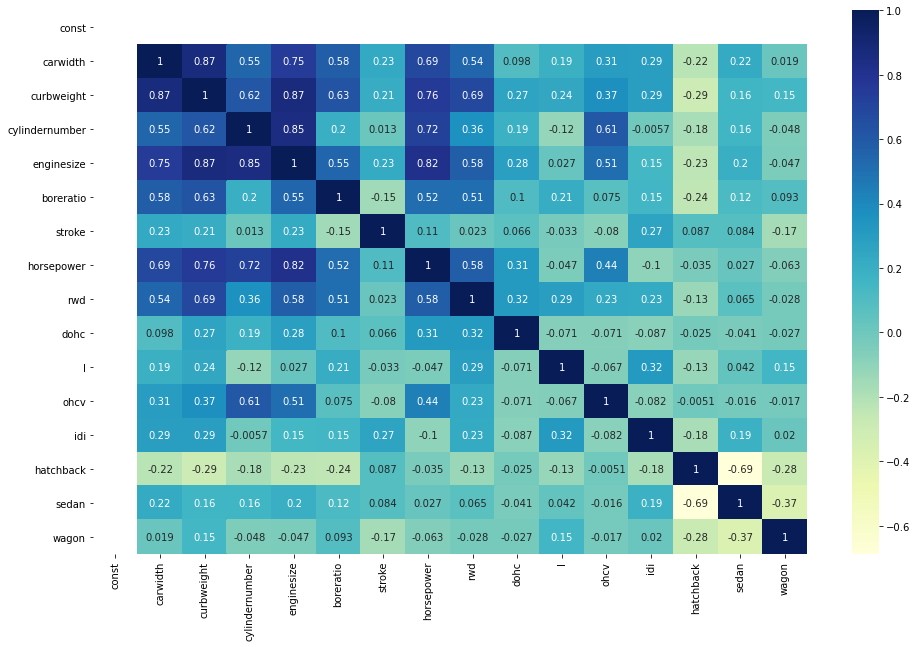

In [90]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

Since `curbweight` has very high VIF and P value, we will remove it.

In [91]:
X_train_new = X_train_rfe.drop(["curbweight"], axis = 1)

In [92]:
model(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     90.21
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           3.63e-59
Time:                        01:37:53   Log-Likelihood:                -32.329
No. Observations:                 143   AIC:                             94.66
Df Residuals:                     128   BIC:                             139.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e-16      0.027   5.37e

,Features,VIF
3,enginesize,29.54
2,cylindernumber,17.01
4,boreratio,6.78
13,sedan,6.53
12,hatchback,6.18
6,horsepower,5.35
5,stroke,3.81
14,wagon,3.67
1,carwidth,3.51
7,rwd,2.39


Since `enginesize` has very high VIF, we will remove it.

In [93]:
X_train_new = X_train_new.drop(["enginesize"], axis = 1)

In [94]:
model(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     59.59
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           5.24e-48
Time:                        01:39:21   Log-Likelihood:                -63.724
No. Observations:                 143   AIC:                             155.4
Df Residuals:                     129   BIC:                             196.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e-16      0.033   4.33e

,Features,VIF
12,sedan,6.40
11,hatchback,5.97
5,horsepower,5.33
13,wagon,3.60
2,cylindernumber,3.58
1,carwidth,3.47
3,boreratio,2.52
6,rwd,2.20
9,ohcv,1.80
10,idi,1.66


The feature `boreratio` has very high P value, so we will remove it.

In [95]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)

In [96]:
model(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     65.02
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           6.56e-49
Time:                        01:58:56   Log-Likelihood:                -63.761
No. Observations:                 143   AIC:                             153.5
Df Residuals:                     130   BIC:                             192.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e-16      0.033   4.34e

,Features,VIF
11,sedan,6.35
10,hatchback,5.79
4,horsepower,4.45
12,wagon,3.58
2,cylindernumber,3.08
1,carwidth,3.03
5,rwd,2.18
8,ohcv,1.78
9,idi,1.62
7,l,1.36


The feature `stroke` has very high P value, so we will remove it.

In [97]:
X_train_new = X_train_new.drop(["stroke"], axis = 1)

In [98]:
model(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     71.23
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           9.11e-50
Time:                        01:59:01   Log-Likelihood:                -63.968
No. Observations:                 143   AIC:                             151.9
Df Residuals:                     131   BIC:                             187.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e-16      0.033   4.35e

,Features,VIF
10,sedan,6.31
9,hatchback,5.70
3,horsepower,4.41
11,wagon,3.58
2,cylindernumber,3.04
1,carwidth,2.94
4,rwd,2.12
7,ohcv,1.78
8,idi,1.51
6,l,1.34


The feature `idi` has high P value (0.08), so we will remove it.

In [99]:
X_train_new = X_train_new.drop(["idi"], axis = 1)

In [100]:
model(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     76.81
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           4.64e-50
Time:                        01:59:04   Log-Likelihood:                -65.651
No. Observations:                 143   AIC:                             153.3
Df Residuals:                     132   BIC:                             185.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e-16      0.033   4.32e

,Features,VIF
9,sedan,6.31
8,hatchback,5.70
3,horsepower,3.71
10,wagon,3.58
2,cylindernumber,3.00
1,carwidth,2.53
4,rwd,2.01
7,ohcv,1.76
5,dohc,1.33
6,l,1.32


The feature `sedan` has high VIF, so we will remove it.

In [101]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

In [102]:
model(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     82.26
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           5.83e-50
Time:                        01:59:06   Log-Likelihood:                -68.348
No. Observations:                 143   AIC:                             156.7
Df Residuals:                     133   BIC:                             186.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e-16      0.034   4.25e

,Features,VIF
3,horsepower,3.67
2,cylindernumber,2.99
1,carwidth,2.40
4,rwd,1.97
7,ohcv,1.75
6,l,1.32
5,dohc,1.31
8,hatchback,1.26
9,wagon,1.12
0,const,1.00


The feature `wagon` has very high P value, so we will remove it.

In [103]:
X_train_new= X_train_new.drop('wagon',axis=1)

In [104]:
model(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     92.19
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.10e-50
Time:                        01:59:09   Log-Likelihood:                -69.034
No. Observations:                 143   AIC:                             156.1
Df Residuals:                     134   BIC:                             182.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e-16      0.034   4.25e

,Features,VIF
3,horsepower,3.67
2,cylindernumber,2.97
1,carwidth,2.40
4,rwd,1.95
7,ohcv,1.74
5,dohc,1.31
6,l,1.30
8,hatchback,1.16
0,const,1.00


Since the feature `dohc` has high P value, we will remove it.

In [105]:
X_train_new= X_train_new.drop('dohc',axis=1)

In [106]:
model(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     102.6
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           6.84e-51
Time:                        01:59:12   Log-Likelihood:                -71.054
No. Observations:                 143   AIC:                             158.1
Df Residuals:                     135   BIC:                             181.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e-16      0.034   4.21e

,Features,VIF
3,horsepower,3.51
2,cylindernumber,2.94
1,carwidth,2.29
4,rwd,1.83
6,ohcv,1.62
5,l,1.28
7,hatchback,1.16
0,const,1.00


The above is a pretty good model with Adj R square of 83.4%. But let's check the correlations between the above features with the dependent variable.

In [107]:
corr_df= pd.DataFrame()
corr_df['column']= X_train_new.columns
corr_df['corr_with_price']=[y_train.corr(X_train_new[a]) for a in X_train_new.columns]
corr_df

,column,corr_with_price
0,const,NaN
1,carwidth,0.80
2,cylindernumber,0.69
3,horsepower,0.81
4,rwd,0.68
5,l,0.04
6,ohcv,0.34
7,hatchback,-0.25


We could see varibale 'ohcv' has good correlation of 0.34 with the price but in the above model we got it's coefficient to be -0.1013. Let's try to remove it and check adj R square value.

In [108]:
X_train_new= X_train_new.drop('ohcv',axis=1)

In [109]:
model(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     115.1
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           8.53e-51
Time:                        01:59:28   Log-Likelihood:                -73.868
No. Observations:                 143   AIC:                             161.7
Df Residuals:                     136   BIC:                             182.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e-16      0.035   4.14e

,Features,VIF
3,horsepower,3.51
1,carwidth,2.29
2,cylindernumber,2.26
4,rwd,1.83
5,l,1.28
6,hatchback,1.14
0,const,1.00


We got only 0.6 %  of reduction adj R-square value which is very negligible. Let's try to remove `l` and check.

In [110]:
X_train_new= X_train_new.drop('l',axis=1)

In [111]:
model(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     133.0
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           8.84e-51
Time:                        01:59:37   Log-Likelihood:                -76.547
No. Observations:                 143   AIC:                             165.1
Df Residuals:                     137   BIC:                             182.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e-16      0.035   4.08e

,Features,VIF
3,horsepower,3.34
2,cylindernumber,2.21
1,carwidth,2.16
4,rwd,1.63
5,hatchback,1.14
0,const,1.00


So the above model is good with adj-R square value of 82.3 %. We will take the above model.

In [112]:
lm_final= sm.OLS(y_train,X_train_new).fit()

In [113]:
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     133.0
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           8.84e-51
Time:                        01:59:42   Log-Likelihood:                -76.547
No. Observations:                 143   AIC:                             165.1
Df Residuals:                     137   BIC:                             182.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e-16      0.035   4.08e

In [114]:
X_train_new.columns

Index(['const', 'carwidth', 'cylindernumber', 'horsepower', 'rwd',
       'hatchback'],
      dtype='object')

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [115]:
y_train_pred= lm_final.predict(X_train_new)

Text(0.5, 0, 'error')

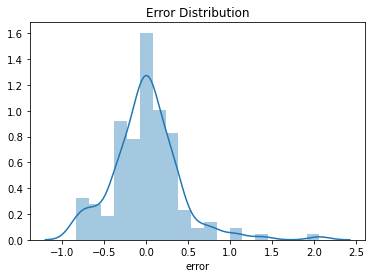

In [116]:
sns.distplot(y_train-y_train_pred)
plt.title('Error Distribution')
plt.xlabel('error',fontsize=10)

In [117]:
y_train.shape

(143,)

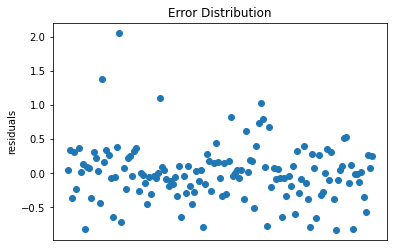

In [120]:
x= [i for i in range (1,144,1)]
plt.scatter(x,y_train-y_train_pred)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

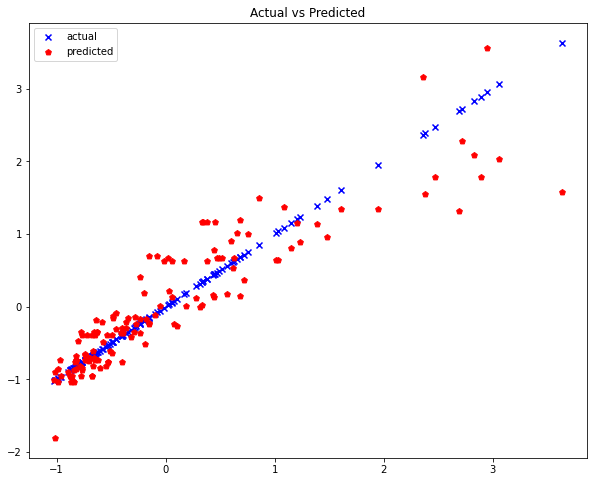

In [121]:
plt.figure(figsize=(10,8))
plt.scatter(y_train,y_train, c='b', marker='x', label='actual')
plt.scatter(y_train, y_train_pred, c='r', marker='p', label='predicted')
plt.title('Actual vs Predicted')
plt.legend(loc='upper left')
plt.show()

## Making prediction on test data

In [122]:
df_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fwd,rwd,car_name_bin,dohc,l,ohc,ohcf,ohcv,1bbl,2bbl,idi,mpfi,spdi,hardtop,hatchback,sedan,wagon
160,0,0,0,4,0,95.7,166.3,64.4,53.0,2094,4,98,3.19,3.03,9.0,70,4800,38,47,7738.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
186,2,0,0,4,0,97.3,171.7,65.5,55.7,2275,4,109,3.19,3.40,9.0,85,5250,27,34,8495.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
59,1,0,0,2,0,98.8,177.8,66.5,53.7,2385,4,122,3.39,3.39,8.6,84,4800,26,32,8845.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
165,1,0,0,2,0,94.5,168.7,64.0,52.6,2265,4,98,3.24,3.08,9.4,112,6600,26,29,9298.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
140,2,0,0,2,0,93.3,157.3,63.8,55.7,2240,4,108,3.62,2.64,8.7,73,4400,26,31,7603.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


In [123]:
df_test.shape

(62, 37)

In [124]:
df_test = pd.DataFrame(scaler.transform(df_test.values), columns= df_test.columns, index=df_test.index)

In [125]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fwd,rwd,car_name_bin,dohc,l,ohc,ohcf,ohcv,1bbl,2bbl,idi,mpfi,spdi,hardtop,hatchback,sedan,wagon
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,6.20e+01,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,6.20e+01,62.00,62.00,62.00,62.00,62.00,62.00,6.20e+01,62.00,62.00
mean,0.10,0.08,-0.01,0.01,0.30,0.13,0.17,0.10,0.24,9.78e-02,-0.07,0.16,0.28,0.06,0.08,0.13,-0.03,-0.09,-0.06,0.09,-0.06,0.15,0.12,-0.15,-0.06,0.26,-0.13,6.50e-03,-0.03,-0.19,0.08,0.12,0.03,0.42,-8.32e-03,-0.05,-0.11
std,1.14,1.11,1.00,1.01,2.14,1.04,0.93,0.90,1.01,8.53e-01,0.76,1.06,1.11,1.02,1.16,0.99,0.98,0.93,0.97,1.08,1.02,1.04,1.09,0.70,0.89,0.86,0.78,1.02e+00,0.94,0.93,1.11,1.02,1.08,1.92,1.01e+00,1.00,0.88
min,-2.35,-0.32,-0.47,-1.13,-0.08,-2.01,-2.30,-1.51,-1.71,-1.33e+00,-0.35,-1.13,-2.95,-3.79,-0.81,-1.28,-2.04,-1.71,-2.14,-0.98,-1.21,-0.73,-0.61,-0.27,-0.26,-1.48,-0.30,-2.59e-01,-0.24,-0.73,-0.32,-0.89,-0.21,-0.15,-7.22e-01,-0.95,-0.39
25%,-0.67,-0.32,-0.47,-1.13,-0.08,-0.48,-0.32,-0.56,-0.58,-4.87e-01,-0.35,-0.42,-0.45,-0.32,-0.41,-0.73,-0.69,-0.96,-0.85,-0.59,-1.21,-0.73,-0.61,-0.27,-0.26,0.68,-0.30,-2.59e-01,-0.24,-0.73,-0.32,-0.89,-0.21,-0.15,-7.22e-01,-0.95,-0.39
50%,0.17,-0.32,-0.47,0.89,-0.08,-0.11,0.11,-0.11,0.37,-8.31e-03,-0.35,-0.10,0.32,0.32,-0.28,-0.05,-0.27,-0.21,-0.13,-0.28,0.83,-0.73,-0.61,-0.27,-0.26,0.68,-0.30,-2.59e-01,-0.24,-0.73,-0.32,0.12,-0.21,-0.15,-7.22e-01,-0.95,-0.39
75%,1.01,-0.32,-0.47,0.89,-0.08,0.78,0.95,0.30,0.89,7.46e-01,-0.35,0.48,1.20,0.67,-0.17,0.42,0.72,0.54,0.45,0.46,0.83,1.36,0.69,-0.27,-0.26,0.68,-0.30,-2.59e-01,-0.24,0.84,-0.32,1.13,-0.21,-0.15,1.39e+00,1.05,-0.39
max,1.85,3.16,2.12,0.89,11.92,3.77,2.76,2.79,2.58,2.51e+00,3.11,4.48,1.89,2.09,3.42,2.64,3.06,1.89,2.32,4.16,0.83,1.36,1.98,3.65,3.86,0.68,3.30,3.86e+00,4.11,1.36,3.16,1.13,4.78,6.83,1.39e+00,1.05,2.55


In [126]:
y_test = df_test.pop('price')
X_test = df_test

In [127]:
X_test_new= X_test[['carwidth', 'cylindernumber', 'horsepower', 'rwd','hatchback']]
X_test_new.head()

,carwidth,cylindernumber,horsepower,rwd,hatchback
160,-0.65,-0.35,-0.82,-0.73,-0.72
186,-0.15,-0.35,-0.44,-0.73,-0.72
59,0.30,-0.35,-0.47,-0.73,1.39
165,-0.83,-0.35,0.24,1.36,-0.72
140,-0.92,-0.35,-0.75,-0.73,1.39


In [128]:
X_test_new = sm.add_constant(X_test_new)

In [129]:
X_test_new.head()

,const,carwidth,cylindernumber,horsepower,rwd,hatchback
160,1.0,-0.65,-0.35,-0.82,-0.73,-0.72
186,1.0,-0.15,-0.35,-0.44,-0.73,-0.72
59,1.0,0.30,-0.35,-0.47,-0.73,1.39
165,1.0,-0.83,-0.35,0.24,1.36,-0.72
140,1.0,-0.92,-0.35,-0.75,-0.73,1.39


In [130]:
y_test_pred= lm_final.predict(X_test_new)

Text(0.5, 1.0, 'Error Distribution')

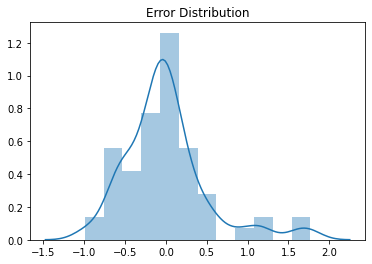

In [131]:
sns.distplot(y_test-y_test_pred)
plt.title('Error Distribution')

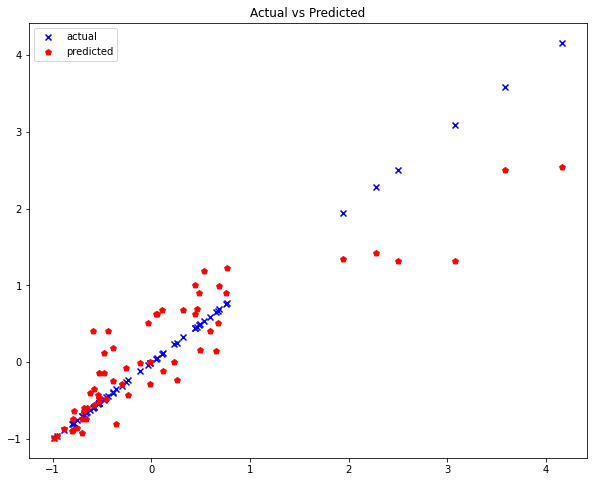

In [132]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_test, c='b', marker='x', label='actual')
plt.scatter(y_test, y_test_pred, c='r', marker='p', label='predicted')
plt.title('Actual vs Predicted')
plt.legend(loc='upper left')
plt.show()

In [133]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7735465999288278